<a href="https://colab.research.google.com/github/catastropiyush/Splinezz/blob/main/Spline_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Piyush R.Maharana
import numpy as np
import matplotlib.pyplot as plt
P = np.zeros((5,5))
h1=[2,1,1,4] ; H1=[3,3,-1,8]
N=4
for w in range(1,N):
  P[w][w+1]   = h1[w]
for k in range(0,N-1):
  P[k+1][k]   = h1[k]
for l in range(1,N):
  P[l][l] = 2*(P[l][l-1]+P[l][l+1])
P[0][0]=1
P[N][N]=1
print(P)

[[ 1.  0.  0.  0.  0.]
 [ 2.  6.  1.  0.  0.]
 [ 0.  1.  4.  1.  0.]
 [ 0.  0.  1. 10.  4.]
 [ 0.  0.  0.  0.  1.]]


In [ ]:
H1 = [3,3,-1,8]
h1  =[2,1,1,4]
B=np.zeros((5,1))
for s in range(1,len(B)-1):
  B[s][0]=3*((H1[s]/h1[s])-(H1[s-1]/h1[s-1]))
print(B)

[[  0. ]
 [  4.5]
 [-12. ]
 [  9. ]
 [  0. ]]


In [ ]:
B[2][0]

-12.0

In [ ]:
#Thomas Algorithm
gamma  = [0]*N
rho    = [0]*(N+1)
gamma[0] = P[0][1]/P[0][0]
rho[0]   = B[0][0]/P[0][0]
for o in range(1,N):
#gamma[1]=P[1][2]/(P[1][1]-gamma[0]*P[1][0])
  gamma[o]=P[o][o+1]/(P[o][o]-gamma[o-1]*P[o][o-1])
for z in range(1,N+1):
   rho[z]=(B[z][0]-rho[z-1]*P[z][z-1])/(P[z][z]-gamma[z-1]*P[z][z-1])

In [ ]:
rho

[0.0, 0.75, -3.326086956521739, 1.2656249999999998, 0.0]

In [ ]:
rho1    = [0]*(N+1)
rho1[0]  = B[0][0]/P[0][0]
rho1=[(B[z][0]-rho[z-1]*P[z][z-1])/(P[z][z]-gamma[z-1]*P[z][z-1]) for z in range(1,N+1)]
rho1

[0.75, -3.326086956521739, 1.2656249999999998, 0.0]

In [ ]:
c=[0]*(N+1)
c[-1]=rho[-1]
for t in reversed(range(0,N)):
  c[t]=rho[t]-gamma[t]*c[t+1]
print(c)

[0.0, 1.359375, -3.6562499999999996, 1.2656249999999998, 0.0]


In [ ]:
c1 = [rho[t]-gamma[t]*c[t+1] for t in reversed(range(0,N))]

In [ ]:
#b coefficient nikalna hai
b=[0]*N
for g in range(0,N):
  b[g]=(H1[g]/h1[g])-(h1[g]/3)*(2*c[g]+c[g+1])
 

In [ ]:
 b1 = [(H1[g]/h1[g])-(h1[g]/3)*(2*c[g]+c[g+1]) for g in range(0,N)]
 b1

[0.59375, 3.3125, 1.0156249999999996, -1.3749999999999991]

In [ ]:
b

[0.59375, 3.3125, 1.0156249999999996, -1.3749999999999991]

In [ ]:
d=[0]*N
for e in range(0,N):
  d[e]=(c[e+1]-c[e])/(3*h1[e])

In [ ]:
 d1=[0]*N
 d1 = [(c[e+1]-c[e])/(3*h1[e]) for e in range(0,N)]
 print(d1)

[0.2265625, -1.671875, 1.6406249999999998, -0.10546874999999999]


In [ ]:
d

[0.2265625, -1.671875, 1.6406249999999998, -0.10546874999999999]

In [ ]:
x=[1,3,4,5,9] ; y=[2,5,8,7,15]
h1=[2,1,1,4] ; H1=[3,3,-1,8]

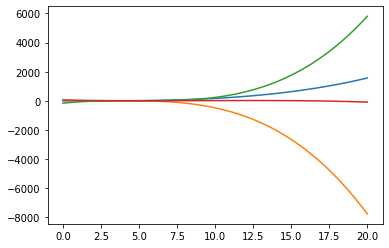

In [ ]:
x1=np.linspace(0,20,100)
def spline(r):
  return y[r]+b[r]*(x1-x[r])+c[r]*(x1-x[r])**2+d[r]*(x1-x[r])**3
plt.plot(x1,spline(0))
plt.plot(x1,spline(1))
plt.plot(x1,spline(2))
plt.plot(x1,spline(3))


In [ ]:
#Spline Interpolation Piyush Oct 12,2022
#3:33 spline ho gaya
import numpy as np
import matplotlib.pyplot as plt

#input data
x=[1,3,4,5,9] ; y=[2,5,8,7,15]
N=len(x)-1

h =[0]*N   ; H =[0]*N   #x diff and y diff
b =[0]*N   ; d =[0]*N

for i in range(0,N):
  h[i]=x[i+1]-x[i]
  H[i]=y[i+1]-y[i]
A = np.zeros((5,5))
print("h");print(h)
print("H");print(H)

A[0][0]=1; A[N,N]=1 #Boundary conditions

#Constructing A
for w in range(1,N):
  A[w][w+1]   = h[w]
for k in range(0,N-1):
  A[k+1][k]   = h[k]
for l in range(1,N):
  A[l][l] = 2*(A[l][l-1]+A[l][l+1])
print("Matrix A");print(A)

B=np.zeros((5,1))
for s in range(1,len(B)-1):
  B[s][0]=3*((H[s]/h[s])-(H[s-1]/h[s-1]))
print("Matrix B");print(B)

#Thomas Algorithm to solve tridiagonal matrix
gamma  = [0]*N
rho    = [0]*(N+1)
gamma[0] = A[0][1]/A[0][0]
rho[0]   = B[0][0]/A[0][0]

for o in range(1,N):
  gamma[o]=A[o][o+1]/(A[o][o]-gamma[o-1]*A[o][o-1])
for z in range(1,N+1):
   rho[z]=(B[z][0]-rho[z-1]*A[z][z-1])/(A[z][z]-gamma[z-1]*A[z][z-1])
print("rho");print(rho)
print("gamma"); print(gamma)

c=[0]*(N+1)
c[-1]=rho[-1]
for t in reversed(range(0,N)):
  c[t]=rho[t]-gamma[t]*c[t+1]
print("c");print(c)

#calculate coefficients
b = [(H[g]/h[g])-(h[g]/3)*(2*c[g]+c[g+1]) for g in range(0,N)]
print("b");print(b)
d = [(c[e+1]-c[e])/(3*h[e]) for e in range(0,N)]
print("d");print(d)

h
[2, 1, 1, 4]
H
[3, 3, -1, 8]
Matrix A
[[ 1.  0.  0.  0.  0.]
 [ 2.  6.  1.  0.  0.]
 [ 0.  1.  4.  1.  0.]
 [ 0.  0.  1. 10.  4.]
 [ 0.  0.  0.  0.  1.]]
Matrix B
[[  0. ]
 [  4.5]
 [-12. ]
 [  9. ]
 [  0. ]]
rho
[0.0, 0.75, -3.326086956521739, 1.2656249999999998, 0.0]
gamma
[0.0, 0.16666666666666666, 0.2608695652173913, 0.4107142857142857]
c
[0.0, 1.359375, -3.6562499999999996, 1.2656249999999998, 0.0]
b
[0.59375, 3.3125, 1.0156249999999996, -1.3749999999999991]
d
[0.2265625, -1.671875, 1.6406249999999998, -0.10546874999999999]


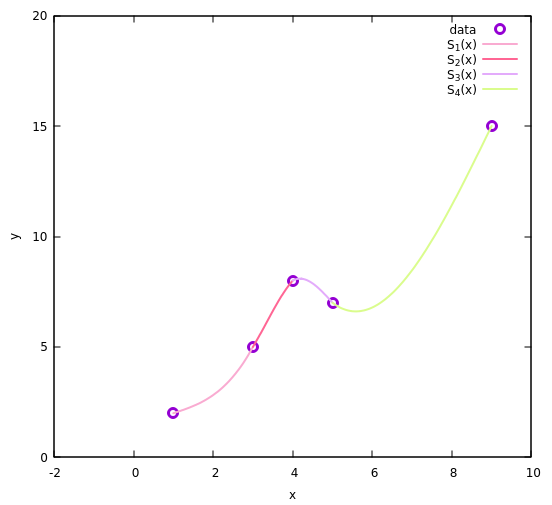